In [49]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Modyfikacja sygnału w dziedzinie częstotliwości

Weźmy sygnał sinusoidalny zawierający dwie częstotliwości: $1kHz$ i $2kHz$. Chcemy z tego sygnału usunąć jedną z tych częstotliwości, ale nie wiemy nic na temat filtrowania - jest na to prosty sposób oparty o szybką transformatę Fouriera i jej odswrotną funckję.

1. Wygeneruj w/w sygnał i narysuj jego wykres. Możesz użyć funkcji *P.xlim(0,0.01)* żeby zbliżyć początek wykresu.
2. Oblicz transformatę Fouriera i narysuj widmo amplitudowe sygnału.
3. Skasuj wartości na jednej z wybranej częstotliwości i jakimś zakresie przed i po, np $900-1100 Hz$, żeby skasować sygnał $1kHz$.
4. Weź pod uwagę że transformata Fouriera musi być symteryczna, więc zastosuj operację opisaną niżej.
5. Narysuj poprawiony wykres widma sygnału.
6. Dokonaj odwrotnej transformaty i narysuj poprawiony sygnał. Wypisz również wartośc próbek sygnału. Jeśli operacja w pkt. 6 została dokonana poprawnie, wartość liczb urojonych (*np.imag*) wyniku powinien być zero (albo bardzo bliski zera).

## Symetryczność Hermitowska

\begin{equation}
H_{F_{s}-x}=H_x^\star \text{, dla } x \in <1,F_s-1>
\end{equation}

Implementacyjnie można zastosować następujące kroki/funkcje:

1. Pobieramy wartości lewej części wykresu (bez 0 i $F_s/2$)
2. Stosujemy *np.flipud* żeby je odwrócić
3. Stosujemy na tym *np.conj* żeby wyliczyć sprzężenie.
4. Wklejamy wynik na odpowiednie miejsce po prawej stronie wykresu (również bez $F_s/2$)

/usr/local/lib/python3.4/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(0, 0.01)

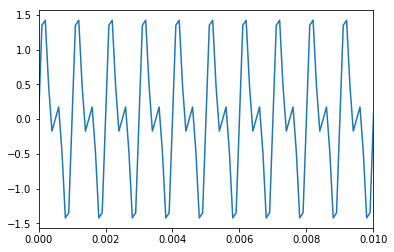

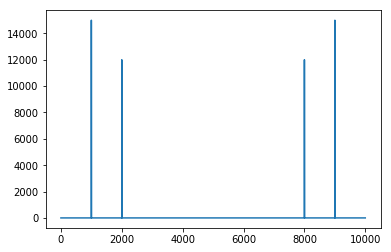

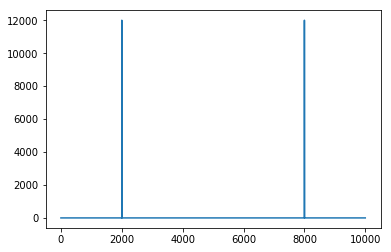

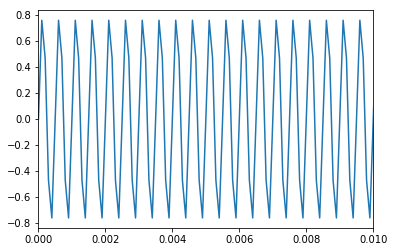

In [28]:
T = 3
Fs = 10000

f1 = 1000
f2 = 2000
t = arange(0, T, 1/Fs)
y = sin(2*pi*f1*t) + 0.8*sin(2*pi*f2*t)

Y = fft.fft(y)

figure()
plot(t,y)
xlim(0,0.01)

figure()
f = linspace(0, Fs, y.size)
plot(f, abs(Y))

Y[2700:3300] = 0

N = y.size
h = Y[1:int(N/2)]
h = flipud(h)
h = conj(h)
Y[int(N/2+1):] = h

figure()
plot(f, abs(Y))

y = fft.ifft(Y)

figure()
plot(t,y)
xlim(0,0.01)

## Alternatywne rozwiązanie

Zamiast funkcji *np.fft.fft* i *np.fft.ifft* można stosować bardziej wydajne funkcje *np.fft.rfft* i *np.fft.irfft*. R-FFT liczy tylko lewą część wykresu (czyli od $0..F_s/2$), a I-R-FFT liczy odwrotną funkcję z wyniku R-FFT ignorując wymogi symetrii, jak w przykładzie powyżej.

Powtórz poprzednie zadanie użwyając *np.fft.rfft* i *np.fft.irfft*.

(0, 0.01)

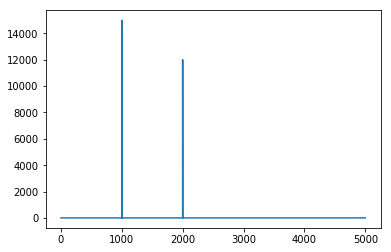

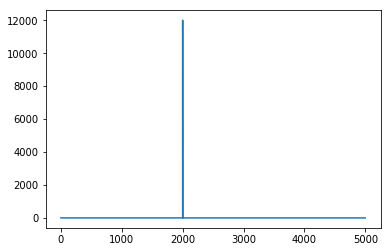

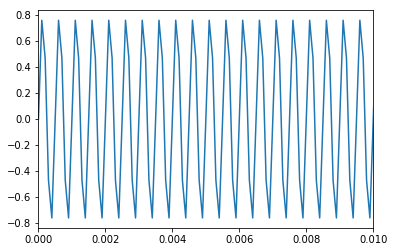

In [29]:
T = 3
Fs = 10000

f1 = 1000
f2 = 2000
t = arange(0, T, 1/Fs)
y = sin(2*pi*f1*t) + 0.8*sin(2*pi*f2*t)

Y = fft.rfft(y)

figure()
f = linspace(0, Fs/2, Y.size)
plot(f, abs(Y))

Y[2700:3300] = 0

figure()
plot(f, abs(Y))

y = fft.irfft(Y)

figure()
plot(t,y)
xlim(0,0.01)

# Przeciek częstotliwości

1. Wygeneruj sekwencję liczb od 999 do 1001 w ilości np. 100 sztuk.
2. W pętli dokonaj utworzenie sygnału o częstotliwości z pkt 1, amplitudzie 1 i zerowej fazie.
3. Również w pętli wylicz transformatę Fouriera sygnału i policz wartość wierzchołka (funkcją *np.max*) i zapisz wynik w jakiejś liście.
4. Narysuj listę wartości z pkt. 3. na wykresie którego oś X to wartości z pkt. 1.

Zauważ, że wartość amplitudy wcale nie jest stała i zmienia się nawet o 40%! Zobaczmy jak wyglądają wykresy skrajnych wartości tego eksperymentu. Narysuj wykres transformaty Fouriera sygnału o częstotliwości gdzie amplituda była najniższa i najwyższa (możesz policzyć *np.argmin* z listy w pkt. 3 oraz użyć tego indeksu żeby pobrać wartość z listy w pkt. 1). Zbliż wykres widma amplitudowego do zakresu częstotliwości od $980 Hz$ do $1020 Hz$ używając *P.xlim*.

Zauważ, że w maksymalnym przypadku wykres wygląda idealnie: jest jeden punkt, a jego wartość jest równa wartości amplitudy pomnożonej przez połowę ilości próbek sygnału (druga połowa się znajduje na prawej stronie wykresu). 

W minimalnym przypadku wykres wygląda zupełnie inaczej. Ponieważ położenie analizowanej częstotliwości nie leży w żadnym punkcie transformaty, amplituda tej sinusoidy się "rozlewa" na sąsiednie wartości.

(990, 1010)

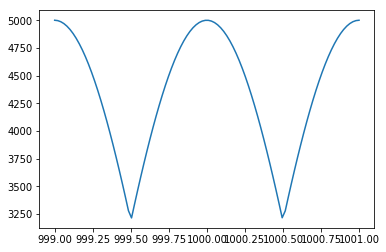

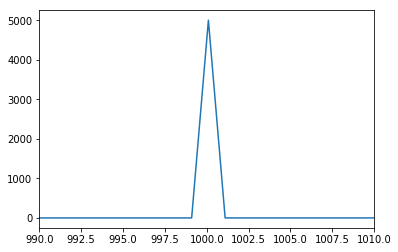

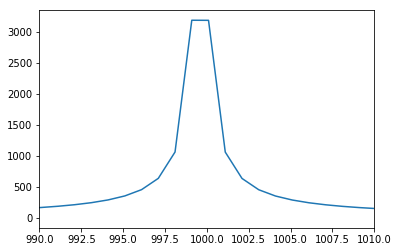

In [30]:
T = 1
Fs = 10000
t = arange(0, T, 1/Fs)

fs = linspace(999, 1001, 100)

hs=[]
for f in fs:
    y = sin(2*pi*f*t)
    
    Y = fft.fft(y)
    h = abs(Y).max()
    
    hs.append(h)
    
plot(fs, hs)

y = sin(2*pi*1000*t)
Y = fft.fft(y)
f = linspace(0, Fs, Y.size)
figure()
plot(f,abs(Y))
xlim(990,1010)

y = sin(2*pi*999.5*t)
Y = fft.fft(y)
f = linspace(0, Fs, Y.size)
figure()
plot(f,abs(Y))
xlim(990,1010)

# Okienkowanie

Narysuj funkcję Hamminga i jej widmo amplitudowe. Wygneruj 10ms sygnału sinusowego o 1 kHz. Narysuj jego widmo amplitudowe i zauważ jaki ma przeciek. Pomnoż teraz ten sygnał z oknem Hamminga (o tej samej długości) i ponownie narysuj jego widmo amplitudowe. 

(990, 1010)

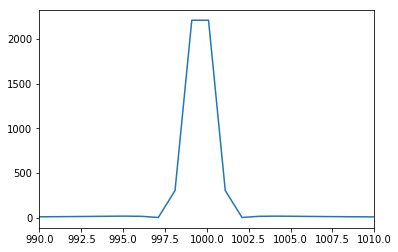

In [31]:

y = sin(2*pi*999.5*t)
h = hamming(y.size)
y*=h

Y = fft.fft(y)
f = linspace(0, Fs, Y.size)
figure()
plot(f,abs(Y))
xlim(990,1010)

# STFT

Zaimplementujmy własną STFT. Zacznijmy od zdefiniowania sygnału. Zróbmy najpierw sygnał 5 sekundowy o $F_s$ 16 kHz, składający się z jednej składowej 1000 Hz i wzrastającej częstotliwości o 0 do $2*F_s$. Inny sygnał możesz wczytać z pliku.

(0, 0.1)

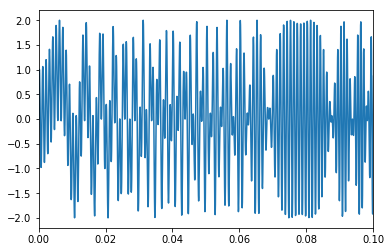

In [32]:
T = 5 
Fs = 16000
t = arange(0, T, 1/Fs)

y1 = sin(2*pi*1000*t)

y2 = sin(2*pi*linspace(0, Fs*2, t.size)*t)

y=y1+y2

plot(t,y)
xlim(0,0.1)


Zacznijmy od podziału sygnału na krótko-okresowe okienka, albo ramki.

Zdefiniuj najpierw takie zmienne:

  * $L$ - długość sygnału (w próbkach)
  * $T$ - długość sygnały (w sekundach) 
  * $win\_len$ - szerokość okienka (w próbkach) - np. 256
  * $win\_shift$ - przesunięcie okienka (w próbkach) - np. 128
  * $win\_num$ - ilość okienek sygnału (zaokrąglone w dół) - $\frac{L-win\_len}{win\_shift}+1$
  * $S$ - macierz 2D zer o rozmiarze ($\frac{win\_len}{2}+1$,$win\_num$)
  
W pętli wyciągnijmy poszczególne ramki ze sygnału, a potem wykonajmy transformatę Fouriera na każdej ramce osobno i wynik zapiszmy w macierzy S.

Oblicz indeksy osi X i Y wykresu i użyj metody *pyploy.pcolormesh* żeby narysować moduł tablicy S. Możesz też wyliczyć logarytm z modułu, żeby lepiej zobaczyć "szczegóły".

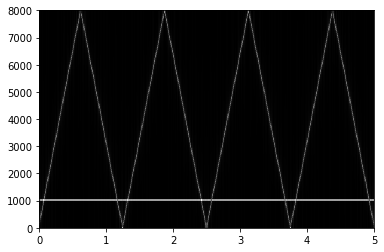

In [33]:
L = y.size
T = y.size/Fs

win_len = 256
win_shift = 128

win_num = int(((L - win_len)/win_shift) + 1)

S = zeros((int(win_len/2+1), win_num))

for w in range(win_num):
    win_beg = w*win_shift
    win_end = win_beg+win_len
    
    win = copy(y[win_beg:win_end])
    
    S[:, w] = abs(fft.rfft(win))
    
t = linspace(0, T, win_num)
f = linspace(0, Fs/2, int(win_len/2+1))

pcolormesh(t,f,S, cmap = cm.gray)

Obraz jest dosyć zaszumiony. Zastosuj jakąś funkcję okienkującą, żeby go "wyczyścić".

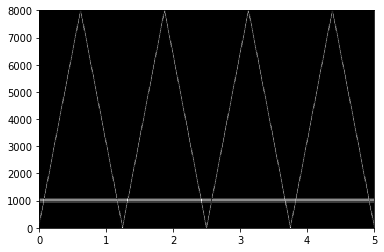

In [34]:
L = y.size
T = y.size/Fs

win_len = 256
win_shift = 128

win_num = int(((L - win_len)/win_shift) + 1)

S = zeros((int(win_len/2+1), win_num))

for w in range(win_num):
    win_beg = w*win_shift
    win_end = win_beg+win_len
    
    win = copy(y[win_beg:win_end])
    win *= hamming(win.size)
    
    S[:, w] = abs(fft.rfft(win))
    
t = linspace(0, T, win_num)
f = linspace(0, Fs/2, int(win_len/2+1))

pcolormesh(t,f,S, cmap = cm.gray)

Co się stanie jak zmienimy rozmiar okienka?

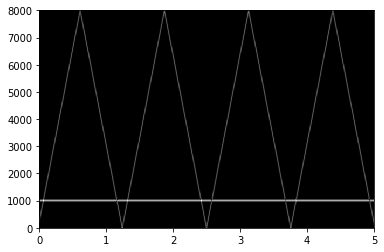

In [35]:
L = y.size
T = y.size/Fs

win_len = 512
# zmniejszacz rozdzielczosc w czasie - zwiekszasz w czestotliwsoci

win_shift = 128

win_num = int(((L - win_len)/win_shift) + 1)

S = zeros((int(win_len/2+1), win_num))

for w in range(win_num):
    win_beg = w*win_shift
    win_end = win_beg+win_len
    
    win = copy(y[win_beg:win_end])
    win *= hamming(win.size)
    
    S[:, w] = abs(fft.rfft(win))
    
t = linspace(0, T, win_num)
f = linspace(0, Fs/2, int(win_len/2+1))

pcolormesh(t,f,S, cmap = cm.gray)

Co sie stanie jak dodamy DC-offset do sygnału?

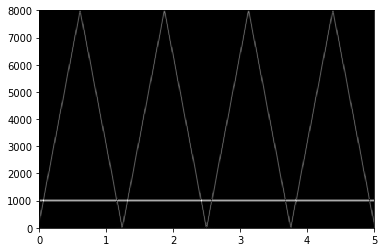

In [37]:
L = y.size
T = y.size/Fs

win_len = 512
# zmniejszacz rozdzielczosc w czasie - zwiekszasz w czestotliwsoci

win_shift = 128

win_num = int(((L - win_len)/win_shift) + 1)

S = zeros((int(win_len/2+1), win_num))

for w in range(win_num):
    win_beg = w*win_shift
    win_end = win_beg+win_len
    
    win = copy(y[win_beg:win_end]+5)
    win-=win.mean()
    win *= hamming(win.size)
    
    S[:, w] = abs(fft.rfft(win))
    
t = linspace(0, T, win_num)
f = linspace(0, Fs/2, int(win_len/2+1))

pcolormesh(t,f,S, cmap = cm.gray)

Obraz ma dosyć niską "rozdzielczość". Dodaj parametr $fftn$ (np. 512 - generalnie potęga 2) i policz każdą transformatę Fouriera  na okienku z dopisanymi zerami, tak żeby rozmiar okienka odpowiadał temu parametrowi (tzw. *zero-padding*).

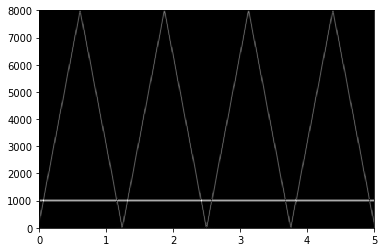

In [41]:
L = y.size
T = y.size/Fs

win_len = 512
# zmniejszacz rozdzielczosc w czasie - zwiekszasz w czestotliwsoci

win_shift = 128

win_num = int(((L - win_len)/win_shift) + 1)

fftn= 512

S = zeros((int(win_len/2+1), win_num))

win = zeros(fftn)

for w in range(win_num):
    win_beg = w*win_shift
    win_end = win_beg+win_len
    
    win_tmp= copy(y[win_beg:win_end])
    win[:win_tmp.size]=win_tmp
    win-=win.mean()
    win *= hamming(win.size)
    
    S[:, w] = abs(fft.rfft(win))
    
t = linspace(0, T, win_num)
f = linspace(0, Fs/2, int(win_len/2+1))

pcolormesh(t,f,S, cmap = cm.gray)

Użyj teraz funkcji *pyplot.specgram* żeby osiągnąć to samo. Sprawdź dokumentację żeby zobaczyć poszcególne parametry.

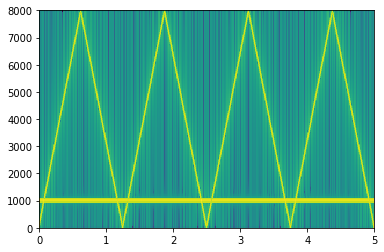

In [46]:
S=specgram(y, Fs=Fs, window=hamming(256), NFFT=256)

# Praca domowa

## 1. Filtrowanie w dziedzinie częstotliwości

Użyj metody modyfikacji sygnału w dziedzinie częstotliwości żeby odtworzyć tylko niskie ($<200Hz$), średnie (między $500Hz$, a $1000Hz$) oraz wysokie (między $2 kHz$, a $4 kHz$) częstotliwości pliku *zdanie.wav*.

In [90]:
from ipywidgets import HTML
from IPython.display import display
from IPython.display import Audio
from scipy.io.wavfile import read 

fs, y = read("zdanie.wav")

Y = fft.rfft(y)
N = Y.size
x = arange(0, N, 1)

mask_s = zeros(N)
mask_s[np.where(x < 200)] = 1
Ysmall = Y * mask_s
y_small = fft.irfft(Ysmall)

mask_m = zeros(N)
mask_m[np.where((x > 500)*(x < 1000))] = 1
Ymid = Y * mask_m
y_mid = fft.irfft(Ymid)

mask_l = zeros(N)
mask_l[np.where((x > 2000)*(x < 4000))] = 1
Ylarge = Y * mask_l
y_large = fft.irfft(Ylarge)

display(Audio(y, rate=fs))
display(Audio(y_small, rate=fs))
display(Audio(y_mid, rate=fs))
display(Audio(y_large, rate=fs))

## 2. Funkcje okienkowe

Narysuj i przetestuj następujące funkcje apodyzacyjne obecne w pakiecie numpy:

* bartlett
* blackman
* hamming
* hanning
* kaiser

Przetestuj również różne ustawienia wartości $\beta$ dla funkcji *kaiser* według porad na stronie:

http://docs.scipy.org/doc/numpy/reference/generated/numpy.kaiser.html

Zwróć szczególną uwagę na widmo amplitudowe w skali logarytmicznej poszczególnych okienek.

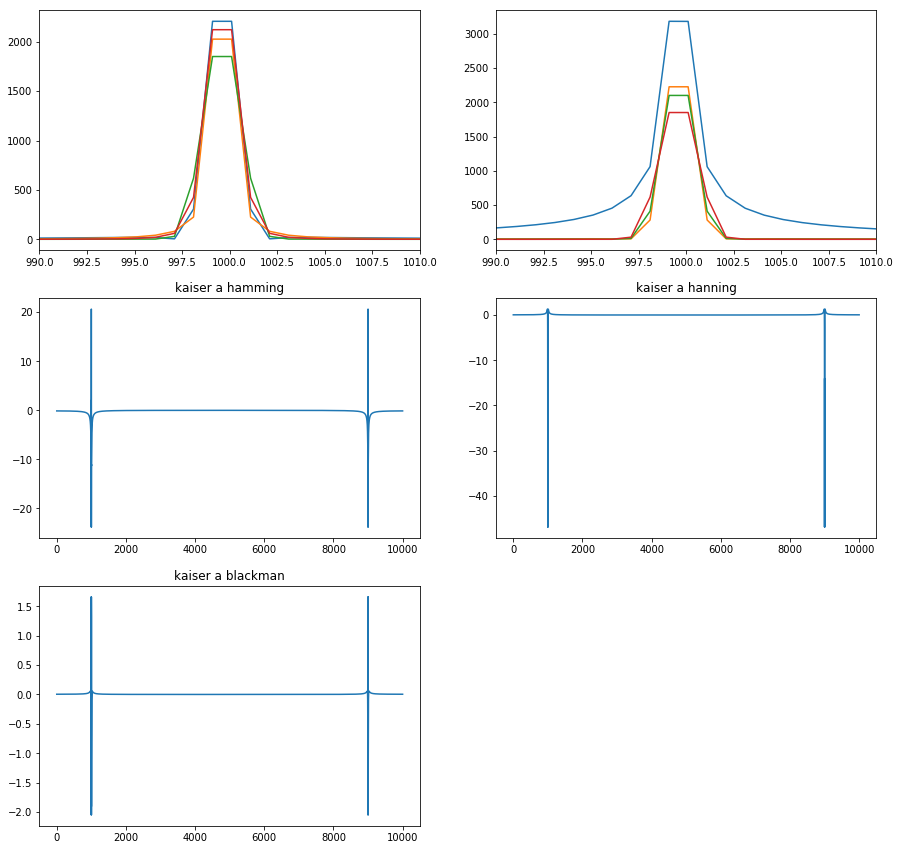

In [121]:
T = 1
Fs = 10000
t = arange(0, T, 1/Fs)

y = sin(2*pi*999.5*t)
h = hamming(y.size)
yh=y*h
Yh = fft.fft(yh)

b = bartlett(y.size)
yb=y*b
Yb = fft.fft(yb)

bl = blackman(y.size)
ybl=y*bl
Ybl = fft.fft(ybl)

hn = hanning(y.size)
yhn=y*hn
Yhn = fft.fft(yhn)

k0 = kaiser(y.size, 0)
yk0=y*k0
Yk0 = fft.fft(yk0)

k5 = kaiser(y.size, 5)
yk5=y*k5
Yk5 = fft.fft(yk5)

k6 = kaiser(y.size, 6)
yk6=y*k6
Yk6 = fft.fft(yk6)

k8 = kaiser(y.size, 8.6)
yk8=y*k8
Yk8 = fft.fft(yk8)

f = linspace(0, Fs, Y.size)
figure(figsize=(15,15))
subplot(3,2,1)
plot(f,abs(Yh))
plot(f,abs(Yb))
plot(f,abs(Ybl))
plot(f,abs(Yhn))
xlim(990,1010)

subplot(3,2,2)
plot(f,abs(Yk0))
plot(f,abs(Yk5))
plot(f,abs(Yk6))
plot(f,abs(Yk8))
xlim(990,1010)

subplot(3,2,3)
title("kaiser a hamming")
plot(f,abs(Yk5)-abs(Yh))

subplot(3,2,4)
title("kaiser a hanning")
plot(f,abs(Yk6)-abs(Yhn))

subplot(3,2,5)
title("kaiser a blackman")
plot(f,abs(Yk8)-abs(Ybl))